In [1]:
%matplotlib notebook
#%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 100
import numpy as np
from kendapy.ekf import Ekf

In [19]:
fname='/project/meteo/work/Leonhard.Scheck/verSYNOP.2016060900'
ekf = Ekf(fname, filter='state=obs_only varname=RAD_GL', verbose=True)
print('{} observations are left after filtering...'.format(ekf.n_obs()))


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
-- Ekf : Opening /project/meteo/work/Leonhard.Scheck/verSYNOP.2016060900...
-- global attributes :
--                     history | 201910282122     ICON 201606090000 verification                                
201910282122 COSMO ME 201605260000 forecast vv=33600                            
--                       title | ICON       Verification Data
--                 institution | German Weather Service
--                      source | ICON       2.01
--         file_version_number |  1.02
--                       n_hdr | 11143
--                      n_body | 92307
--                     n_radar | 0
--       verification_ref_date | 20160609
--       verification_ref_time | 0
--          verification_start | 0
--            verification_end | 0
--                  resolution | [0.02 0.02]
--                 domain_size | [651 716  65]
--                pole_lat_lon | [  40. -170.]
--          lower_left_la

      ACTIVE          NONE  |      REJECTED          NONE  |        4     0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      2      2      0  
      ACTIVE          NONE  |      OBS ONLY          NONE  |    19910   369     33   2705      0      0      0      0      0   3835   1714   1448      0     34   4686    768      0      0      0   1707    845      0      0      0   1766  
     PASSIVE        NO OBS  |        ACTIVE          NONE  |       12     0      0      0      5      0      7      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0  
     PASSIVE        NO OBS  |       PASSIVE          RULE  |      418     0      0      0      0      0      7    137      0      0      0      0      0      0      0      0      0      0      0      0      0      0    137    137      0  
     PASSIVE        NO OBS  |       PASSIVE 

    OBS ONLY        NO OBS  |        ACTIVE          NONE  |      666     0      0      0    566      0    100      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0  
    OBS ONLY        NO OBS  |       PASSIVE          RULE  |      158     0      0      0      0      0    158      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0  
    OBS ONLY        NO OBS  |      REJECTED     BLACKLIST  |        5     0      0      0      0      0      5      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0  
    OBS ONLY        NO OBS  |      REJECTED        HEIGHT  |       16     0      0      0      0      0     16      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0  
    OBS ONLY        NO OBS  |      REJECTED 

<IPython.core.display.Javascript object>


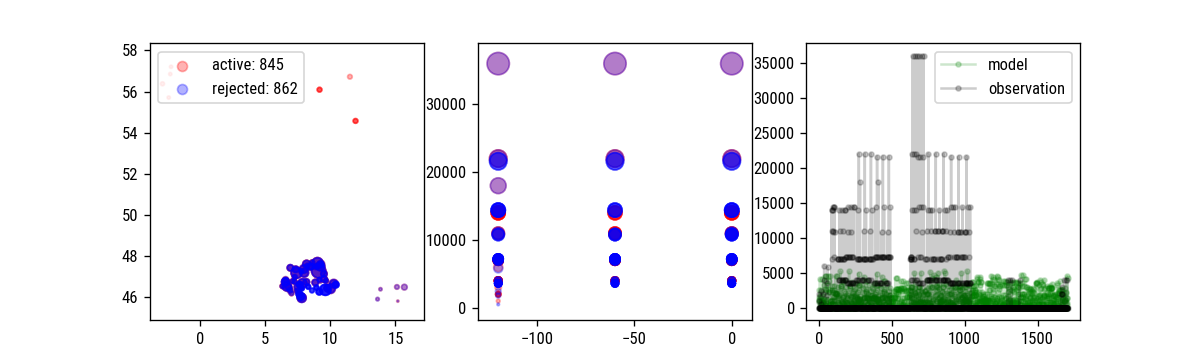

In [18]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
col= ['r','b']
for i, state in enumerate(('active', 'rejected')) :
    f = 'state={}/obs_only varname=RAD_GL'.format(state)
    ax[0].scatter( ekf.obs(param='lon',filter=f), ekf.obs(param='lat',filter=f), s=2e-3*ekf.obs(filter=f), c=col[i], alpha=0.3, label='{}: {}'.format(state,ekf.n_obs(filter=f)) )
    ax[1].scatter( ekf.obs(param='time',filter=f), ekf.obs(filter=f), s=5e-3*ekf.obs(filter=f), c=col[i], alpha=0.3, label='{}: {}'.format(state,ekf.n_obs(filter=f)) )
ax[0].legend()

ekf.replace_filter(filter='state=obs_only varname=RAD_GL')
ax[2].plot( ekf.det(), '.-', color='g', alpha=0.2, label='model')
ax[2].plot( ekf.obs(), '.-', color='k', alpha=0.2, label='observation')
ax[2].legend()

<IPython.core.display.Javascript object>


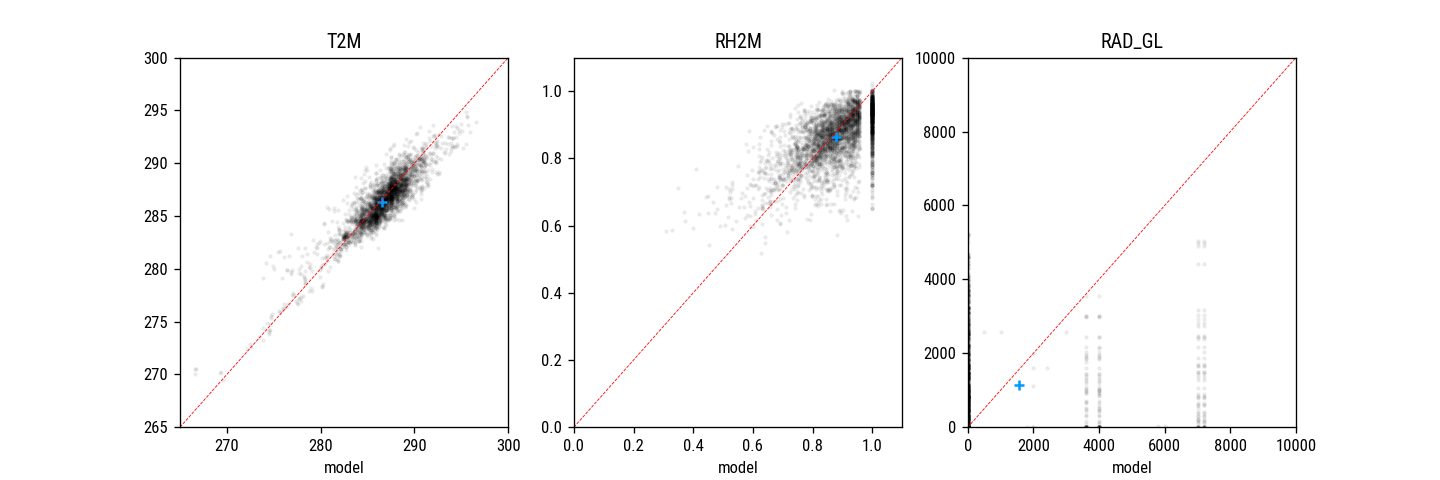

In [4]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
ekf.replace_filter(filter='state=active varname=T2M')
ax[0].scatter( ekf.obs(), ekf.det(), color='k', alpha=0.05, s=3 )
ax[0].scatter( ekf.obs().mean(), ekf.det().mean(), color='#0099ff', marker='+' )
ax[0].set_title('T2M')
ax[0].set_xlabel('obs')
ax[0].set_xlabel('model')
ax[0].set_xlim((265,300))
ax[0].set_ylim((265,300))
ax[0].plot((265,300),(265,300),'--r',linewidth=0.5)

ekf.replace_filter(filter='state=active varname=RH2M')
ax[1].scatter( ekf.obs(), ekf.det(), color='k', alpha=0.05, s=3 )
ax[1].scatter( ekf.obs().mean(), ekf.det().mean(), color='#0099ff', marker='+' )
ax[1].set_xlabel('obs')
ax[1].set_xlabel('model')
ax[1].set_title('RH2M')
ax[1].set_xlim((0,1.1))
ax[1].set_ylim((0,1.1))
ax[1].plot((0,1.1),(0,1.1),'--r',linewidth=0.5)

ekf.replace_filter(filter='state=obs_only varname=RAD_GL')
ax[2].scatter( ekf.obs(), ekf.det(), color='k', alpha=0.05, s=3 )
ax[2].scatter( ekf.obs().mean(), ekf.det().mean(), color='#0099ff', marker='+' )
ax[2].set_xlabel('obs')
ax[2].set_xlabel('model')
ax[2].set_title('RAD_GL')
vmax=1e4
ax[2].set_xlim((0,vmax))
ax[2].set_ylim((0,vmax))
ax[2].plot((0,vmax),(0,vmax),'--r',linewidth=0.5)

In [5]:
ekf.obs().mean(), ekf.det().mean()

(1566.901, 1148.1203866432338)

In [6]:
ekf.obs(param='time').min(), ekf.obs(param='time').mean(), ekf.obs(param='time').max()

(-120, -60.31634446397188, 0)